In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap

import mne
#from pandas_profiling import ProfileReport
#Recurrent neural network to predict 

Link to Datase thttps://osf.io/d7ye5/
reference : Park, S. M. (2021, August 16). EEG machine learning. Retrieved from osf.io/8bsvr 
Context:

Data Dictionary:
    no.
sex
age
eeg.date
education
IQ
main.disorder
specific.disorder
The rest is various EEG readings taken from the recorded patients
Channel Label| Position on Scalp | Channel Label|Position on Scalp |
| -----------| ----------------- |  -----------| ----------------- |
| Fp1| left forehead| Fp2| right forehead| 
| F7| left outer frontal| F8| right outer frontal| 
| T3| left outer medial| T4| right outer medial| 
| T5| left outer posterior| T6| right outer posterior| 
| O1| left back of head| O2| right back of head| 
| F3| left inner frontal|F4|right inner frontal|
| C3|left inner medial|C4|right inner medial|
| P3|left inner posterior|P4|right inner posterior|
| A1|left preauricular area|A2|right preauricular area|
| Fpz|center forehead|Fz|center frontal|
| Cz|center top|Pz|center inner posterior|
| Oz|center back of head|EKG|electrocardiogram|

FP1
FP2
Fz
F4
F8
T3
C3
Cz
C4
T4
T5
P3
Pz => Fpz
P4
T6
O1
O2
Delta :{AB.A.delta.a.FP1, AB.A.delta.b.FP2, AB.A.delta.c.F7, AB.A.delta.d.F3, AB.A.delta.e.Fz,
        AB.A.delta.f.F4, AB.A.delta.g.F8, AB.A.delta.h.T3, AB.A.delta.i.C3, AB.A.delta.j.Cz, 
        AB.A.delta.k.C4, AB.A.delta.l.T4, AB.A.delta.m.T5, AB.A.delta.n.P3, AB.A.delta.o.Pz,
        AB.A.delta.p.P4, AB.A.delta.q.T6, AB.A.delta.r.O1, AB.A.delta.s.O2}
        
Theta :{AB.B.theta.a.FP1, AB.B.theta.b.FP2, AB.B.theta.c.F7, AB.B.theta.d.F3, AB.B.theta.e.Fz
        , AB.B.theta.f.F4, AB.B.theta.g.F8, AB.B.theta.h.T3, AB.B.theta.i.C3, AB.B.theta.j.Cz, 
        AB.B.theta.k.C4, AB.B.theta.l.T4, AB.B.theta.m.T5, AB.B.theta.n.P3, AB.B.theta.o.Pz,
        AB.B.theta.p.P4, AB.B.theta.q.T6, AB.B.theta.r.O1, AB.B.theta.s.O2}
Alpha: {AB.C.alpha.a.FP1, AB.C.alpha.b.FP2, AB.C.alpha.c.F7, AB.C.alpha.d.F3, AB.C.alpha.e.Fz,
        AB.C.alpha.f.F4, AB.C.alpha.g.F8, AB.C.alpha.h.T3, AB.C.alpha.i.C3, AB.C.alpha.j.Cz,
        AB.C.alpha.k.C4, AB.C.alpha.l.T4, AB.C.alpha.m.T5, AB.C.alpha.n.P3, AB.C.alpha.o.Pz,
        AB.C.alpha.p.P4, AB.C.alpha.q.T6, AB.C.alpha.r.O1,AB.C.alpha.s.O2}
Beta: {AB.D.beta.a.FP1, AB.D.beta.b.FP2, AB.D.beta.c.F7, AB.D.beta.d.F3, AB.D.beta.e.Fz,
       AB.D.beta.f.F4, AB.D.beta.g.F8, AB.D.beta.h.T3, AB.D.beta.i.C3, AB.D.beta.j.Cz, AB.D.beta.k.C4,
       AB.D.beta.l.T4, AB.D.beta.m.T5, AB.D.beta.n.P3, AB.D.beta.o.Pz, AB.D.beta.p.P4, AB.D.beta.q.T6,
       AB.D.beta.r.O1,AB.D.beta.s.O2,}
HighBeta: {AB.E.highbeta.a.FP1, AB.E.highbeta.b.FP2, AB.E.highbeta.c.F7, AB.E.highbeta.d.F3,
           AB.E.highbeta.e.Fz, AB.E.highbeta.f.F4, AB.E.highbeta.g.F8, AB.E.highbeta.h.T3,
           AB.E.highbeta.i.C3, AB.E.highbeta.j.Cz, AB.E.highbeta.k.C4, AB.E.highbeta.l.T4, 
           AB.E.highbeta.m.T5, AB.E.highbeta.n.P3, AB.E.highbeta.o.Pz, AB.E.highbeta.p.P4, 
           AB.E.highbeta.q.T6, AB.E.highbeta.r.O1, AB.E.highbeta.s.O2}
Gamma : {AB.F.gamma.a.FP1, AB.F.gamma.b.FP2, AB.F.gamma.c.F7, AB.F.gamma.d.F3, AB.F.gamma.e.Fz,
         AB.F.gamma.f.F4, AB.F.gamma.g.F8, AB.F.gamma.h.T3, AB.F.gamma.i.C3, AB.F.gamma.j.Cz,
         AB.F.gamma.k.C4, AB.F.gamma.l.T4, AB.F.gamma.m.T5, AB.F.gamma.n.P3, AB.F.gamma.o.Pz,
         AB.F.gamma.p.P4, AB.F.gamma.q.T6, AB.F.gamma.r.O1, AB.F.gamma.s.O2}

COH = K-coh/ Oscillation of different ranges


Taken from Research: Using the Neuroguide system (NG Deluxe 3.0.5; Applied Neuroscience, Inc., Largo, FL, USA), continuous EEG data were converted into the frequency domain using the fast Fourier transformation (FFT) with the following parameters: epoch = 2 s, sample rate = 128 samples/s (256 digital time points), frequency range = 0.5–40 Hz, and a resolution of 0.5 Hz with a cosine taper window to minimize leakage. Due to the mathematics of the FFT, a single epoch of time will be noisy; we used at least 60 s length of time (https://www.frontiersin.org/articles/10.3389/fpsyt.2021.707581/full#B27)

<img src ="https://www.frontiersin.org/files/Articles/707581/fpsyt-12-707581-HTML/image_m/fpsyt-12-707581-g001.jpg"
     style = 'float: left; margin-right: 10px;'/>

In [3]:
df = pd.read_csv('data/EEG.machinelearing_data_BRMH.csv')
df.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [4]:
cols = []
for col in df.columns:
    cols.append(col)
    print(col)

no.
sex
age
eeg.date
education
IQ
main.disorder
specific.disorder
AB.A.delta.a.FP1
AB.A.delta.b.FP2
AB.A.delta.c.F7
AB.A.delta.d.F3
AB.A.delta.e.Fz
AB.A.delta.f.F4
AB.A.delta.g.F8
AB.A.delta.h.T3
AB.A.delta.i.C3
AB.A.delta.j.Cz
AB.A.delta.k.C4
AB.A.delta.l.T4
AB.A.delta.m.T5
AB.A.delta.n.P3
AB.A.delta.o.Pz
AB.A.delta.p.P4
AB.A.delta.q.T6
AB.A.delta.r.O1
AB.A.delta.s.O2
AB.B.theta.a.FP1
AB.B.theta.b.FP2
AB.B.theta.c.F7
AB.B.theta.d.F3
AB.B.theta.e.Fz
AB.B.theta.f.F4
AB.B.theta.g.F8
AB.B.theta.h.T3
AB.B.theta.i.C3
AB.B.theta.j.Cz
AB.B.theta.k.C4
AB.B.theta.l.T4
AB.B.theta.m.T5
AB.B.theta.n.P3
AB.B.theta.o.Pz
AB.B.theta.p.P4
AB.B.theta.q.T6
AB.B.theta.r.O1
AB.B.theta.s.O2
AB.C.alpha.a.FP1
AB.C.alpha.b.FP2
AB.C.alpha.c.F7
AB.C.alpha.d.F3
AB.C.alpha.e.Fz
AB.C.alpha.f.F4
AB.C.alpha.g.F8
AB.C.alpha.h.T3
AB.C.alpha.i.C3
AB.C.alpha.j.Cz
AB.C.alpha.k.C4
AB.C.alpha.l.T4
AB.C.alpha.m.T5
AB.C.alpha.n.P3
AB.C.alpha.o.Pz
AB.C.alpha.p.P4
AB.C.alpha.q.T6
AB.C.alpha.r.O1
AB.C.alpha.s.O2
AB.D.beta.a.FP1


In [5]:
df.describe()

,no.,age,education,IQ,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
count,945.000000,945.000000,930.000000,932.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,...,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,473.000000,30.594804,13.438710,101.580472,20.182936,21.177584,17.749553,18.901698,20.447079,19.490329,...,75.889633,55.049113,56.959796,60.739169,69.829254,47.862489,66.832798,39.301406,66.153213,57.056207
std,272.942302,11.781592,2.550461,17.022414,11.282022,12.230662,10.003598,9.079482,9.742912,9.252500,...,15.861641,19.541956,18.326785,18.052887,17.725321,19.685722,17.028701,20.790933,18.088548,19.600107
min,1.000000,18.000000,0.000000,49.000000,3.272260,3.244199,3.050507,3.412618,5.066593,4.048931,...,12.611954,0.519048,6.926792,0.708008,2.421748,0.036664,1.032207,1.228502,0.363268,3.988805
25%,237.000000,21.730000,12.000000,91.000000,12.784872,13.019269,11.134327,12.460586,13.548645,12.637717,...,68.014443,41.607506,43.682444,48.374883,58.937785,32.581046,55.872070,22.049743,54.710605,43.955229
50%,473.000000,26.150000,13.000000,102.000000,17.065286,17.838251,15.541469,16.733004,18.065276,17.432568,...,78.647712,55.158858,56.657348,61.257972,72.298636,45.719426,68.238375,36.549938,67.988937,57.515871
75%,709.000000,35.450000,16.000000,114.000000,24.492760,25.654394,21.623961,23.347900,25.573096,23.956748,...,87.398387,69.740640,70.649245,73.979100,83.066877,62.081839,79.192418,54.169209,79.527764,71.626382
max,945.000000,71.880000,20.000000,145.000000,92.826192,101.515687,91.373456,82.544167,101.566662,77.197502,...,99.678649,100.000000,99.307895,100.000000,99.581629,98.720067,99.650154,98.413320,100.000000,99.287092


In [6]:
df['main.disorder'].unique()
#df['specific.disorder'].unique()

array(['Addictive disorder', 'Trauma and stress related disorder',
       'Mood disorder', 'Healthy control',
       'Obsessive compulsive disorder', 'Schizophrenia',
       'Anxiety disorder'], dtype=object)

In [7]:
allwavesdf = df.loc[:, 'AB.A.delta.a.FP1':'COH.F.gamma.r.O1.s.O2']
deltadf = df.loc[:, 'AB.A.delta.a.FP1':'AB.A.delta.s.O2']
thetadf = df.loc[:, 'AB.B.theta.a.FP1':'AB.B.theta.s.O2']
alphadf = df.loc[:, 'AB.C.alpha.a.FP1':'AB.C.alpha.s.O2']
betadf = df.loc[:, 'AB.D.beta.a.FP1':'AB.D.beta.s.O2']
highbetadf = df.loc[:, 'AB.E.highbeta.a.FP1':'AB.E.highbeta.s.O2']
gammadf = df.loc[:, 'AB.F.gamma.a.FP1':'AB.F.gamma.s.O2']
cohwaves = df.loc[:, 'COH.A.delta.a.FP1.b.FP2':'COH.F.gamma.r.O1.s.O2']

In [8]:
allwavesdflen = len(allwavesdf.columns)
deltadflen = len(deltadf.columns)
thetadflen = len(thetadf.columns)
alphadflen = len(alphadf.columns)
betadflen = len(betadf.columns)
highbetadflen = len(highbetadf.columns)
gammadflen = len(gammadf.columns)
cohwaveslen = len(cohwaves.columns)
print(gammadflen)

19


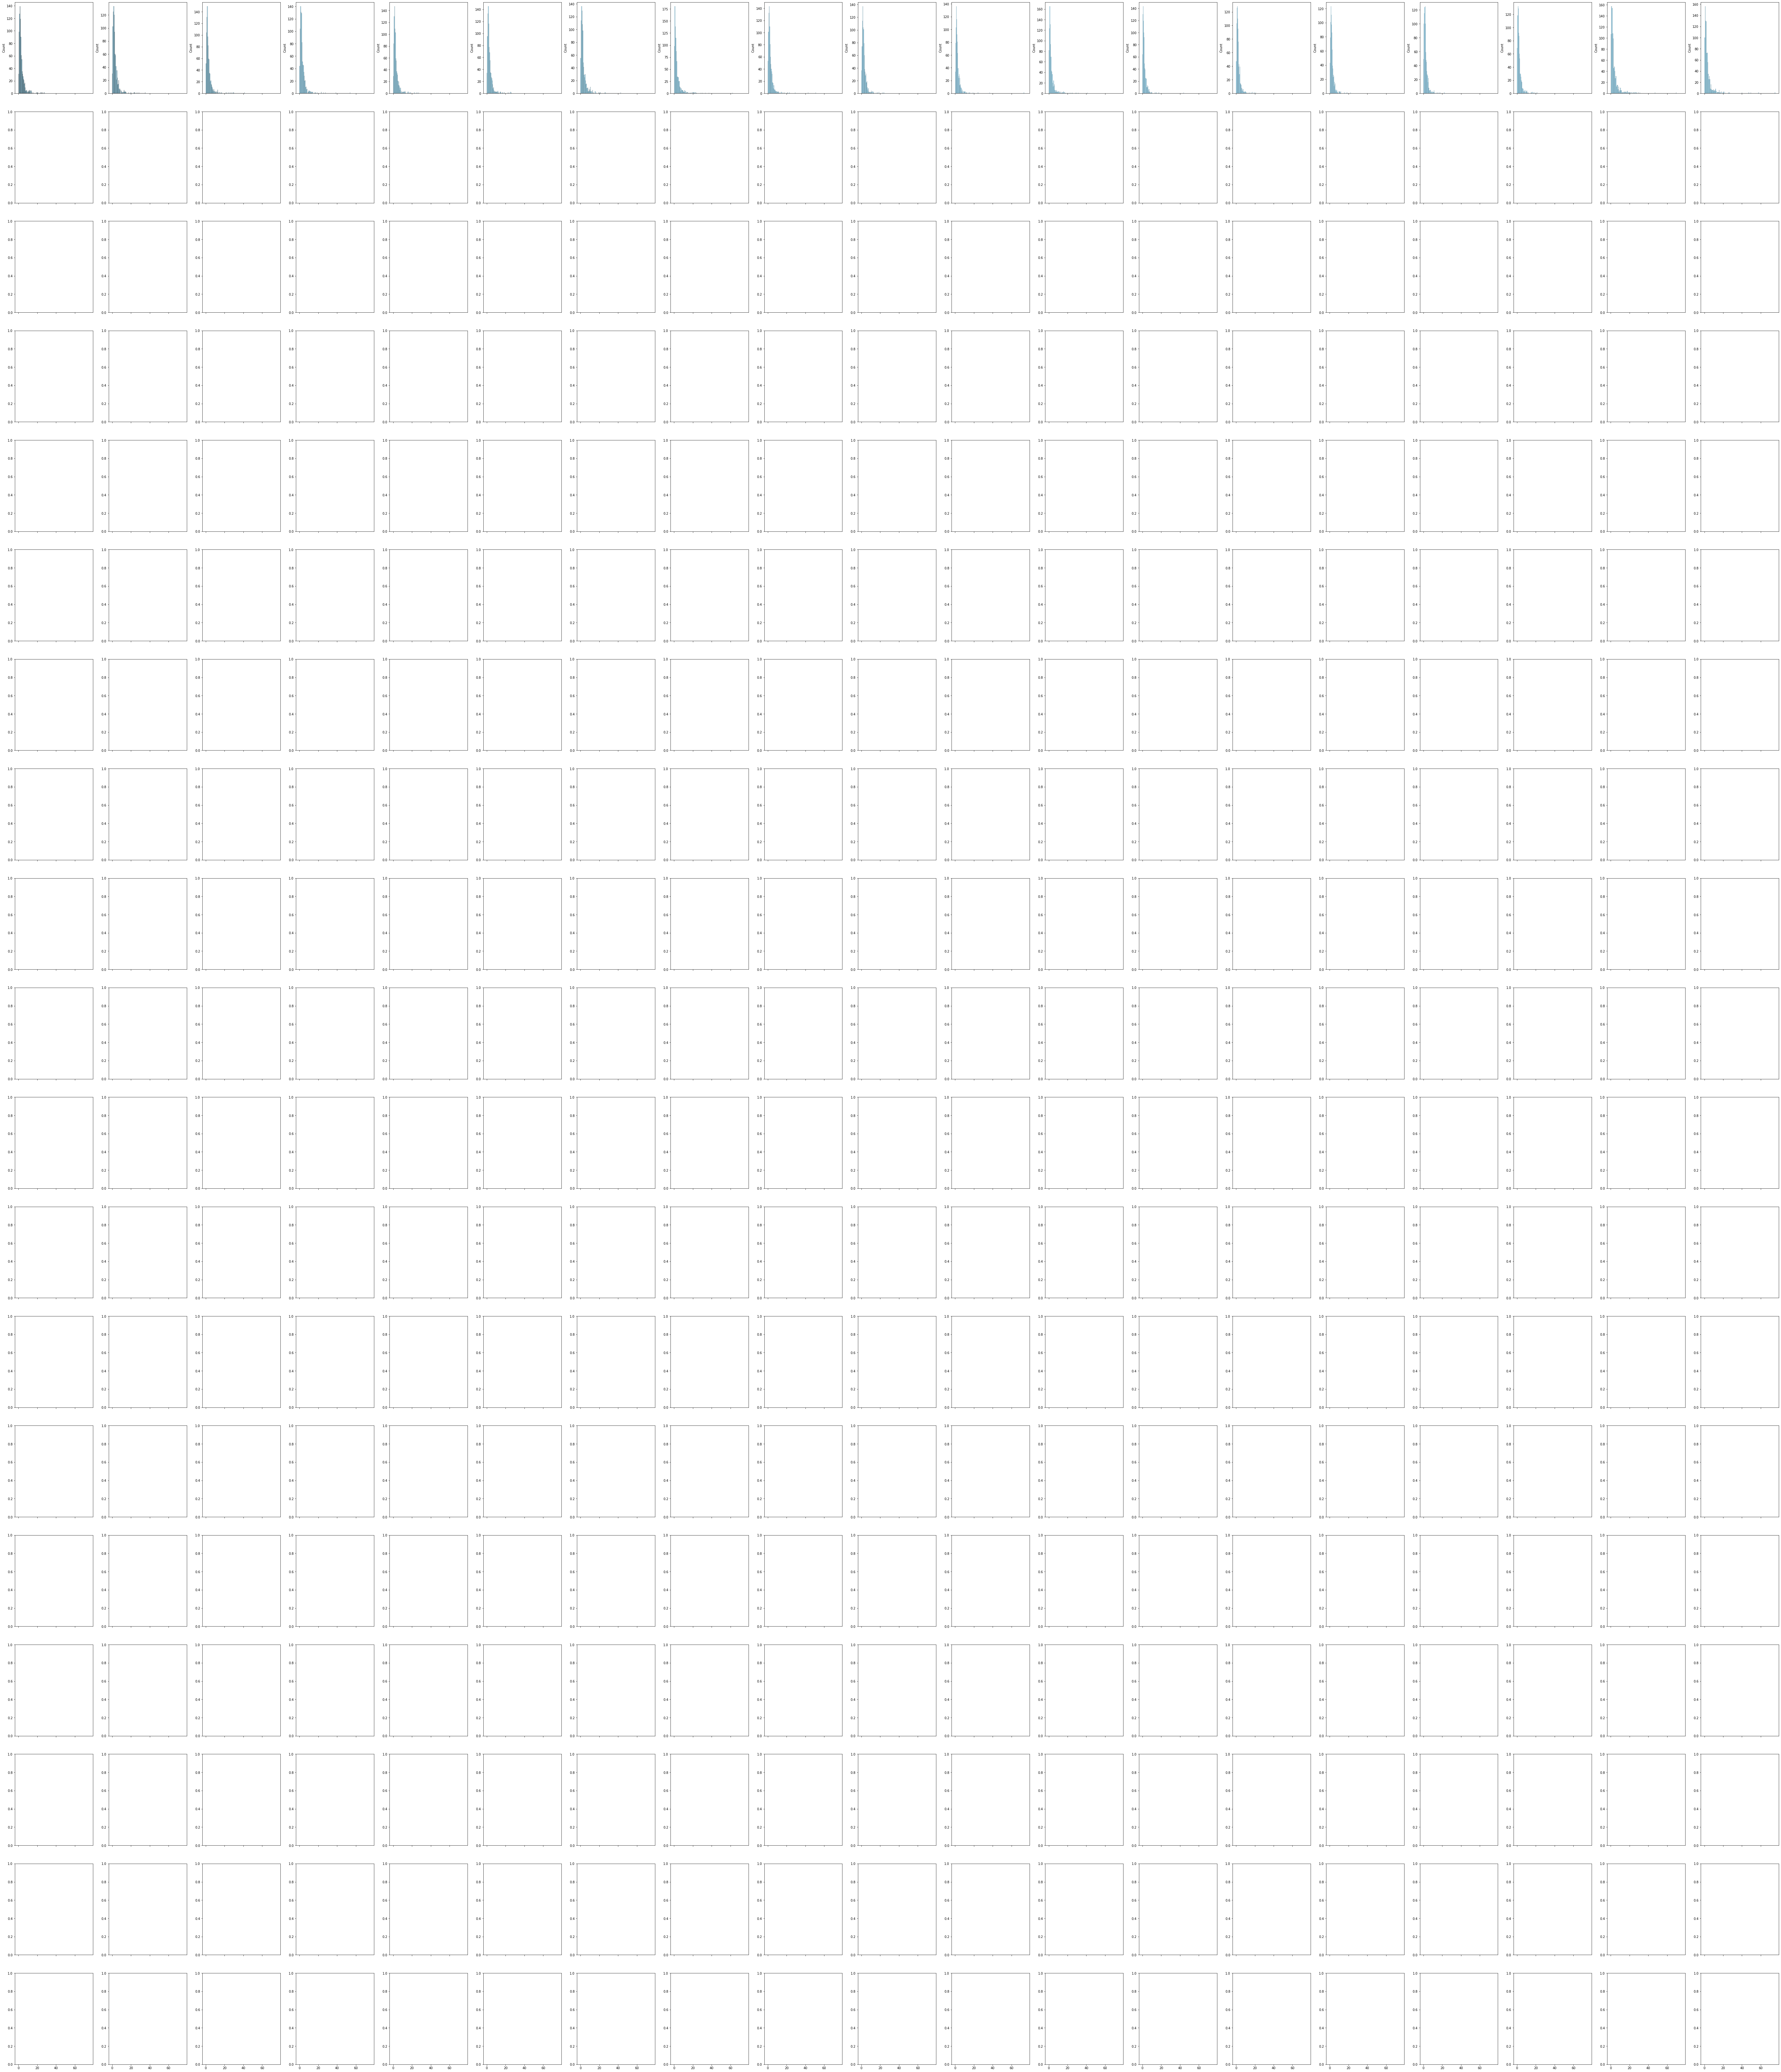

In [9]:
f, axes = plt.subplots(gammadflen, gammadflen, figsize=(100,120), sharex=True)
for ax, feature in zip(axes.flat, gammadf.columns):
    sns.histplot(df[feature] , color="skyblue", ax=ax)

C:\Users\Nicoletta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AB.A.delta.a.FP1', ylabel='Density'>

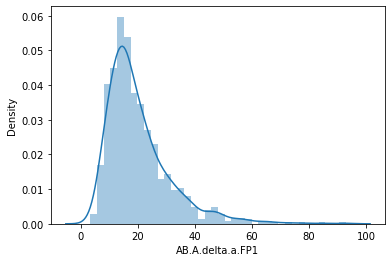

In [9]:
sns.distplot(df['AB.A.delta.a.FP1'])

C:\Users\Nicoletta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='COH.F.gamma.p.P4.r.O1', ylabel='Density'>

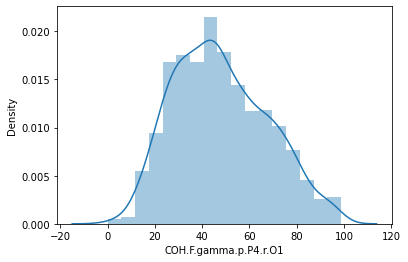

In [10]:
sns.distplot(df['COH.F.gamma.p.P4.r.O1'])

In [ ]:
# first we obtain the 3d positions of selected channels
chs = ['Oz', 'Fpz', 'T7', 'T8']
# when the montage is set, it is transformed to the "head" coordinate frame
# that MNE uses internally, therefore we need to use
# ``fake_evoked.get_montage()`` to get these properly transformed coordinates
montage_head = fake_evoked.get_montage()
ch_pos = montage_head.get_positions()['ch_pos']
pos = np.stack([ch_pos[ch] for ch in chs])

# now we calculate the radius from T7 and T8 x position
# (we could use Oz and Fpz y positions as well)
radius = np.abs(pos[[2, 3], 0]).mean()

# then we obtain the x, y, z sphere center this way:
# x: x position of the Oz channel (should be very close to 0)
# y: y position of the T8 channel (should be very close to 0 too)
# z: average z position of Oz, Fpz, T7 and T8 (their z position should be the
#    the same, so we could also use just one of these channels), it should be
#    positive and somewhere around `0.03` (3 cm)
x = pos[0, 0]
y = pos[-1, 1]
z = pos[:, -1].mean()

# lets print the values we got:
print([f'{v:0.5f}' for v in [x, y, z, radius]])

In [16]:

data_path = mne.datasets.sample.data_path()

Using default location ~/mne_data for sample...
Creating ~/mne_data


100%|#####################################| 1.65G/1.65G [00:00<00:00, 1.65TB/s]
Untarring contents of 'C:\Users\Nicoletta\mne_data\MNE-sample-data-processed.tar.gz' to 'C:\Users\Nicoletta\mne_data'


Attempting to create new mne-python configuration file:
C:\Users\Nicoletta\.mne\mne-python.json


In [18]:
montage_head = cohwaves.get_montage()

AttributeError: 'DataFrame' object has no attribute 'get_montage'

In [33]:
standard_montage = mne.channels.make_standard_montage('standard_1020')
n_channels = len(standard_montage.ch_names)
fake_info = mne.create_info(ch_names=standard_montage.ch_names, sfreq=250.,
                            ch_types='eeg')

rng = np.random.RandomState(0)
data = rng.normal(size=(n_channels, 1)) * 1e-6
fake_evoked = mne.EvokedArray(data, fake_info)
fake_evoked.set_montage(standard_montage)

<Evoked | '' (average, N=1), 0 – 0 sec, baseline off, 94 ch, ~129 kB>

In [34]:
standard_montage.ch_names

['Fp1',
 'Fpz',
 'Fp2',
 'AF9',
 'AF7',
 'AF5',
 'AF3',
 'AF1',
 'AFz',
 'AF2',
 'AF4',
 'AF6',
 'AF8',
 'AF10',
 'F9',
 'F7',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'F10',
 'FT9',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'FCz',
 'FC2',
 'FC4',
 'FC6',
 'FT8',
 'FT10',
 'T9',
 'T7',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'T10',
 'TP9',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'CPz',
 'CP2',
 'CP4',
 'CP6',
 'TP8',
 'TP10',
 'P9',
 'P7',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'P8',
 'P10',
 'PO9',
 'PO7',
 'PO5',
 'PO3',
 'PO1',
 'POz',
 'PO2',
 'PO4',
 'PO6',
 'PO8',
 'PO10',
 'O1',
 'Oz',
 'O2',
 'O9',
 'Iz',
 'O10',
 'T3',
 'T5',
 'T4',
 'T6',
 'M1',
 'M2',
 'A1',
 'A2']

In [30]:
biosemi_montage

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 64 channels>

In [20]:
# first we obtain the 3d positions of selected channels
chs = ['Oz', 'Fpz', 'T7', 'T8']
# when the montage is set, it is transformed to the "head" coordinate frame
# that MNE uses internally, therefore we need to use
# ``fake_evoked.get_montage()`` to get these properly transformed coordinates
montage_head = fake_evoked.get_montage()
ch_pos = montage_head.get_positions()['ch_pos']
pos = np.stack([ch_pos[ch] for ch in chs])

# now we calculate the radius from T7 and T8 x position
# (we could use Oz and Fpz y positions as well)
radius = np.abs(pos[[2, 3], 0]).mean()

# then we obtain the x, y, z sphere center this way:
# x: x position of the Oz channel (should be very close to 0)
# y: y position of the T8 channel (should be very close to 0 too)
# z: average z position of Oz, Fpz, T7 and T8 (their z position should be the
#    the same, so we could also use just one of these channels), it should be
#    positive and somewhere around `0.03` (3 cm)
x = pos[0, 0]
y = pos[-1, 1]
z = pos[:, -1].mean()

# lets print the values we got:
print([f'{v:0.5f}' for v in [x, y, z, radius]])

['0.00000', '0.00000', '0.03683', '0.09494']


In [1]:
montage_head

NameError: name 'montage_head' is not defined

Text(0.5, 1.0, 'EEGLAB channel projection')

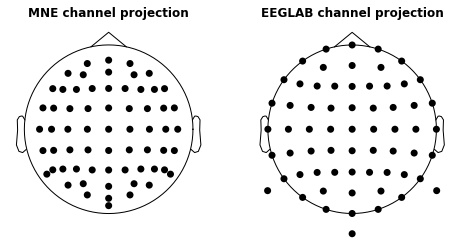

In [21]:
# create a two-panel figure with some space for the titles at the top
fig, ax = plt.subplots(ncols=2, figsize=(8, 4), gridspec_kw=dict(top=0.9),
                       sharex=True, sharey=True)

# we plot the channel positions with default sphere - the mne way
fake_evoked.plot_sensors(axes=ax[0], show=False)

# in the second panel we plot the positions using the EEGLAB reference sphere
fake_evoked.plot_sensors(sphere=(x, y, z, radius), axes=ax[1], show=False)

# add titles
ax[0].set_title('MNE channel projection', fontweight='bold')
ax[1].set_title('EEGLAB channel projection', fontweight='bold')

Text(0.5, 1.0, 'EEGLAB')

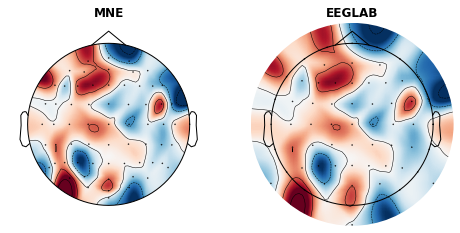

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4), gridspec_kw=dict(top=0.9),
                       sharex=True, sharey=True)

mne.viz.plot_topomap(fake_evoked.data[:, 0], fake_evoked.info, axes=ax[0],
                     show=False)
mne.viz.plot_topomap(fake_evoked.data[:, 0], fake_evoked.info, axes=ax[1],
                     show=False, sphere=(x, y, z, radius))

# add titles
ax[0].set_title('MNE', fontweight='bold')
ax[1].set_title('EEGLAB', fontweight='bold')

In [23]:
fake_evoked.data[:, 0]

array([ 1.76405235e-06,  4.00157208e-07,  9.78737984e-07,  2.24089320e-06,
        1.86755799e-06, -9.77277880e-07,  9.50088418e-07, -1.51357208e-07,
       -1.03218852e-07,  4.10598502e-07,  1.44043571e-07,  1.45427351e-06,
        7.61037725e-07,  1.21675016e-07,  4.43863233e-07,  3.33674327e-07,
        1.49407907e-06, -2.05158264e-07,  3.13067702e-07, -8.54095739e-07,
       -2.55298982e-06,  6.53618595e-07,  8.64436199e-07, -7.42165020e-07,
        2.26975462e-06, -1.45436567e-06,  4.57585173e-08, -1.87183850e-07,
        1.53277921e-06,  1.46935877e-06,  1.54947426e-07,  3.78162520e-07,
       -8.87785748e-07, -1.98079647e-06, -3.47912149e-07,  1.56348969e-07,
        1.23029068e-06,  1.20237985e-06, -3.87326817e-07, -3.02302751e-07,
       -1.04855297e-06, -1.42001794e-06, -1.70627019e-06,  1.95077540e-06,
       -5.09652182e-07, -4.38074302e-07, -1.25279536e-06,  7.77490356e-07,
       -1.61389785e-06, -2.12740280e-07, -8.95466561e-07,  3.86902498e-07,
       -5.10805138e-07, -

In [24]:
fake_evoked.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 250.0 Hz
>

In [28]:
fake_evoked[ch_names]

NameError: name 'ch_names' is not defined

In [29]:
fake_info

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 250.0 Hz
>